In [1]:
import json

file_path = 'test.json'

with open(file_path, 'r', encoding='utf-8') as file:
    data = json.load(file)

for entry in data:
    print("ID:", entry["id"])
    print("Tokens:", entry["tokens"])
    print("NER Tags:", entry["ner_tags"])
    print()


ID: 0
Tokens: ['स्वाइन', 'फ्लू:', 'कहाँ-कहाँ', '.']
NER Tags: [22, 22, 22, 22]

ID: 1
Tokens: ['काश', 'मधुबाला', 'को', 'लंबी', 'उम्र', 'मिली', 'होती', '.']
NER Tags: [22, 8, 22, 22, 22, 22, 22, 22]

ID: 2
Tokens: ['परभूपुर', 'भारत', 'के', 'उत्तर', 'प्रदेश', 'राज्य', 'के', 'इलाहाबाद', 'जिले', 'के', 'हंडिया', 'प्रखण्ड', 'में', 'स्थित', 'एक', 'गाँव', 'है।']
NER Tags: [4, 4, 22, 4, 15, 22, 22, 4, 22, 22, 4, 22, 22, 22, 22, 22, 22]

ID: 3
Tokens: ['७२', 'हेक्टेयर', 'भूमि', 'निर्मित', 'यह', 'राजप्रासाद', 'विश्व', 'के', 'श्रेष्ठ', 'संरक्षित', 'स्थानों', 'में', 'से', 'एक', 'है', '।', '.']
NER Tags: [6, 17, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 6, 22, 22, 22]

ID: 4
Tokens: ['सुर्ख़ियो', 'में', '.']
NER Tags: [22, 22, 22]

ID: 5
Tokens: ['और', 'हाँ', ',', 'फ़िल्म', 'का', 'निगेटिव', 'अक्षय', 'के', 'नाम', 'होगा', '.']
NER Tags: [22, 22, 22, 22, 22, 22, 8, 22, 22, 22, 22]

ID: 6
Tokens: ['सीनेट', 'की', 'एक', 'सुनवाई', 'के', 'दौरान', 'इन', 'कंपनियों', 'ने', 'चेतावनी', 'दी', 'है', 'कि', 'उनके'

In [2]:
len(data)

21657

In [2]:
import random

random.shuffle(data)

train_split = int(0.7 * len(data))
val_split = int(0.15 * len(data)) + train_split


train_data = data[:train_split]
val_data = data[train_split:val_split]
test_data = data[val_split:]

print(f"Training data: {len(train_data)} entries")
print(f"Validation data: {len(val_data)} entries")
print(f"Test data: {len(test_data)} entries")

Training data: 15159 entries
Validation data: 3248 entries
Test data: 3250 entries


In [3]:
train_sentences = []
train_labels = []

for entry in train_data:
    train_sentences.append(entry["tokens"])
    train_labels.append(entry["ner_tags"])

# print(train_labels)
# print()
# print(train_sentences)

In [4]:
val_sentences = []
val_labels = []

for entry in val_data:
    val_sentences.append(entry["tokens"])
    val_labels.append(entry["ner_tags"])

# print(val_labels)
# print()
# print(val_sentences)

In [5]:
test_sentences = []
test_labels = []

for entry in test_data:
    test_sentences.append(entry["tokens"])
    test_labels.append(entry["ner_tags"])

# print(test_labels)
# print()
# print(test_sentences)

In [ ]:
sentences

In [6]:
ix_to_tag = {
    0:"B-FESTIVAL", 1:"B-GAME", 2:"B-LANGUAGE", 3:"B-LITERATURE", 4:"B-LOCATION",
    5:"B-MISC", 6:"B-NUMEX", 7:"B-ORGANIZATION", 8:"B-PERSON", 9:"B-RELIGION",
    10:"B-TIMEX", 11:"I-FESTIVAL", 12:"I-GAME", 13:"I-LANGUAGE", 14:"I-LITERATURE",
    15:"I-LOCATION", 16:"I-MISC", 17:"I-NUMEX", 18:"I-ORGANIZATION", 19:"I-PERSON",
    20:"I-RELIGION", 21:"I-TIMEX", 22:"O"
}


In [7]:
# tag_to_ix = {}
# rank = 0
# for i in train_labels+ test_labels + val_labels:
#     for j in i:
#         if j not in tag_to_ix:
#             tag_to_ix[j] = rank
#             rank += 1
            
ix_to_tag[23] = '<START>'
ix_to_tag[24] = '<STOP>'
print(ix_to_tag)

{0: 'B-FESTIVAL', 1: 'B-GAME', 2: 'B-LANGUAGE', 3: 'B-LITERATURE', 4: 'B-LOCATION', 5: 'B-MISC', 6: 'B-NUMEX', 7: 'B-ORGANIZATION', 8: 'B-PERSON', 9: 'B-RELIGION', 10: 'B-TIMEX', 11: 'I-FESTIVAL', 12: 'I-GAME', 13: 'I-LANGUAGE', 14: 'I-LITERATURE', 15: 'I-LOCATION', 16: 'I-MISC', 17: 'I-NUMEX', 18: 'I-ORGANIZATION', 19: 'I-PERSON', 20: 'I-RELIGION', 21: 'I-TIMEX', 22: 'O', 23: '<START>', 24: '<STOP>'}


In [8]:
word_to_ix = {}
for sentence in train_sentences + val_sentences + test_sentences:
    for word in sentence:
        if word not in word_to_ix:
            word_to_ix[word] = len(word_to_ix)

In [9]:
import torch 

def prepare_embedding_matrix_fasttext(fasttext_model, word_to_ix, embedding_dim=300):
    matrix_len = len(word_to_ix)
    weights_matrix = torch.zeros((matrix_len, embedding_dim))

    for word, i in word_to_ix.items():
        try: 
            weights_matrix[i] = torch.tensor(fasttext_model.wv[word])
        except KeyError:
            weights_matrix[i] = torch.randn((embedding_dim,))
    return weights_matrix


from gensim.models.fasttext import FastText as FT_gensim

fasttext = FT_gensim.load_fasttext_format("cc.hi.300.bin")
embedding_matrix = prepare_embedding_matrix_fasttext(fasttext, word_to_ix)
torch.save(embedding_matrix, 'embedding_matrix.pt')

/var/folders/_1/pytq1skj57b53vp2wq81373w0000gn/T/ipykernel_35835/1797248518.py:17: DeprecationWarning: Call to deprecated `load_fasttext_format` (use load_facebook_vectors (to use pretrained embeddings) or load_facebook_model (to continue training with the loaded full model, more RAM) instead).
  fasttext = FT_gensim.load_fasttext_format("cc.hi.300.bin")


In [13]:
import numpy as np 
import json
import torch
import torch.autograd as autograd
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import f1_score, accuracy_score
from sklearn.preprocessing import LabelEncoder
from gensim.models import KeyedVectors
torch.manual_seed(1)


def prepare_sequence(seq, to_ix):
    idxs = [to_ix[w] for w in seq]
    return torch.tensor(idxs, dtype=torch.long)

def prepare_tags(tags):
    return torch.tensor(tags, dtype=torch.long)

def prepare_embedding_matrix(word_vectors, word_to_ix, embedding_dim=300):
    matrix_len = len(word_to_ix)
    weights_matrix = torch.zeros((matrix_len, embedding_dim))

    for word, i in word_to_ix.items():
        try: 
            weights_matrix[i] = torch.from_numpy(word_vectors[word])
        except KeyError:
            weights_matrix[i] = torch.randn((embedding_dim,))  

    return weights_matrix

def log_sum_exp(vec):
    max_score = vec[0, argmax(vec)]
    max_score_broadcast = max_score.view(1, -1).expand(1, vec.size()[1])
    return max_score + torch.log(torch.sum(torch.exp(vec - max_score_broadcast)))

def argmax(vec):
    _, idx = torch.max(vec, 1)
    return idx.item()

In [16]:
class BiLSTM_CRF(nn.Module):
    def __init__(self, vocab_size, embedding_dim, hidden_dim, embeddings):
        super(BiLSTM_CRF, self).__init__()
        self.embedding_dim = embedding_dim
        self.hidden_dim = hidden_dim
        self.vocab_size = vocab_size
        self.tagset_size = 25
        self.word_embeds = nn.Embedding.from_pretrained(embeddings, freeze=False)
        self.lstm = nn.LSTM(embedding_dim, hidden_dim // 2, num_layers=1, bidirectional=True)
        self.hidden2tag = nn.Linear(hidden_dim, self.tagset_size)
        self.transitions = nn.Parameter(torch.randn(self.tagset_size, self.tagset_size))
        self.transitions.data[23, :] = -10000
        self.transitions.data[:, 24] = -10000

        self.hidden = self.init_hidden()

    def init_hidden(self):
        return (torch.randn(2, 1, self.hidden_dim // 2), torch.randn(2, 1, self.hidden_dim // 2))

    def _forward_alg(self, feats):

        init_alphas = torch.full((1, self.tagset_size), -10000.)
        init_alphas[0][23] = 0.
        forward_var = init_alphas

        for feat in feats:
            alphas_t = [] 
            for next_tag in range(self.tagset_size):
                
                emit_score = feat[next_tag].view(
                    1, -1).expand(1, self.tagset_size)
                trans_score = self.transitions[next_tag].view(1, -1)
                
                next_tag_var = forward_var + trans_score + emit_score
                
                alphas_t.append(log_sum_exp(next_tag_var).view(1))
            forward_var = torch.cat(alphas_t).view(1, -1)
        terminal_var = forward_var + self.transitions[24]
        alpha = log_sum_exp(terminal_var)
        return alpha

    def _get_lstm_features(self, sentence):
        self.hidden = self.init_hidden()
        embeds = self.word_embeds(sentence).view(len(sentence), 1, -1)
        lstm_out, self.hidden = self.lstm(embeds, self.hidden)
        lstm_out = lstm_out.view(len(sentence), self.hidden_dim)
        lstm_feats = self.hidden2tag(lstm_out)
        return lstm_feats

    def _score_sentence(self, feats, tags):
        score = torch.zeros(1)
        tags = torch.cat([torch.tensor([23], dtype=torch.long), tags])
        for i, feat in enumerate(feats):
            score = score + \
                self.transitions[tags[i + 1], tags[i]] + feat[tags[i + 1]]
        score = score + self.transitions[24, tags[-1]]
        return score

    def _viterbi_decode(self, feats):
        backpointers = []

        init_vvars = torch.full((1, self.tagset_size), -10000.)
        init_vvars[0][23] = 0

        forward_var = init_vvars
        for feat in feats:
            bptrs_t = []  
            viterbivars_t = []  

            for next_tag in range(self.tagset_size):
    
                next_tag_var = forward_var + self.transitions[next_tag]
                best_tag_id = argmax(next_tag_var)
                bptrs_t.append(best_tag_id)
                viterbivars_t.append(next_tag_var[0][best_tag_id].view(1))
        
            forward_var = (torch.cat(viterbivars_t) + feat).view(1, -1)
            backpointers.append(bptrs_t)

        terminal_var = forward_var + self.transitions[24]
        best_tag_id = argmax(terminal_var)
        path_score = terminal_var[0][best_tag_id]


        best_path = [best_tag_id]
        for bptrs_t in reversed(backpointers):
            best_tag_id = bptrs_t[best_tag_id]
            best_path.append(best_tag_id)

        start = best_path.pop()
        assert start == 23 
        best_path.reverse()
        return path_score, best_path

    def neg_log_likelihood(self, sentence, tags):
        feats = self._get_lstm_features(sentence)
        forward_score = self._forward_alg(feats)
        gold_score = self._score_sentence(feats, tags)
        return forward_score - gold_score

    def forward(self, sentence): 
        lstm_feats = self._get_lstm_features(sentence)
        score, tag_seq = self._viterbi_decode(lstm_feats)
        return score, tag_seq

START_TAG = "<START>"
STOP_TAG = "<STOP>"
EMBEDDING_DIM = 300
HIDDEN_DIM = 64

# from sklearn.preprocessing import LabelEncoder

# le = LabelEncoder()
# le.fit([tag for sublist in train_labels for tag in sublist])

In [17]:
model = BiLSTM_CRF(len(word_to_ix), EMBEDDING_DIM, HIDDEN_DIM, embedding_matrix)
optimizer = optim.SGD(model.parameters(), lr=0.01, weight_decay=1e-4)


train_losses = []
val_losses = []
train_f1_scores = []
val_f1_scores = []

def calculate_f1(data_sentences, data_labels):
    predictions, true_labels = [], []
    with torch.no_grad():
        for sentence, tags in zip(data_sentences, data_labels):
            sentence_in = prepare_sequence(sentence, word_to_ix)
            targets = prepare_tags(tags)
            loss = model.neg_log_likelihood(sentence_in, targets)
            _, output_tags = model(sentence_in)

            predictions.extend(output_tags) 
            true_labels.extend(tags)   

    return f1_score(true_labels, predictions, average='macro'), loss.item()

for epoch in range(5): 

    model.train()
    total_loss = 0
    for sentence, tags in zip(train_sentences, train_labels):
        model.zero_grad()
        sentence_in = prepare_sequence(sentence, word_to_ix)
        targets = prepare_tags(tags)

        loss = model.neg_log_likelihood(sentence_in, targets)
        
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

    train_loss = total_loss / len(train_sentences)
    train_f1, _ = calculate_f1(train_sentences, train_labels)
    
   
    model.eval()
    val_f1, val_loss = calculate_f1(val_sentences, val_labels)
    
    train_losses.append(train_loss)
    val_losses.append(val_loss)
    train_f1_scores.append(train_f1)
    val_f1_scores.append(val_f1)

    print(f"Epoch {epoch}, Training Loss: {train_loss}, Training F1: {train_f1}, Validation Loss: {val_loss}, Validation F1: {val_f1}")


Epoch 0, Training Loss: 4.628836462857722, Training F1: 0.49177334140392404, Validation Loss: 0.183990478515625, Validation F1: 0.47519419620264736
Epoch 1, Training Loss: 2.054550223303656, Training F1: 0.5952775319344316, Validation Loss: 0.09146881103515625, Validation F1: 0.5497761212397719
Epoch 2, Training Loss: 1.5504275961203455, Training F1: 0.6652635236495266, Validation Loss: 0.07340240478515625, Validation F1: 0.5968979086676988
Epoch 3, Training Loss: 1.2964637924824456, Training F1: 0.708916391773452, Validation Loss: 0.05161285400390625, Validation F1: 0.6177361636510993
Epoch 4, Training Loss: 1.1353927769488887, Training F1: 0.7391263462135182, Validation Loss: 0.0523834228515625, Validation F1: 0.6377718974706952


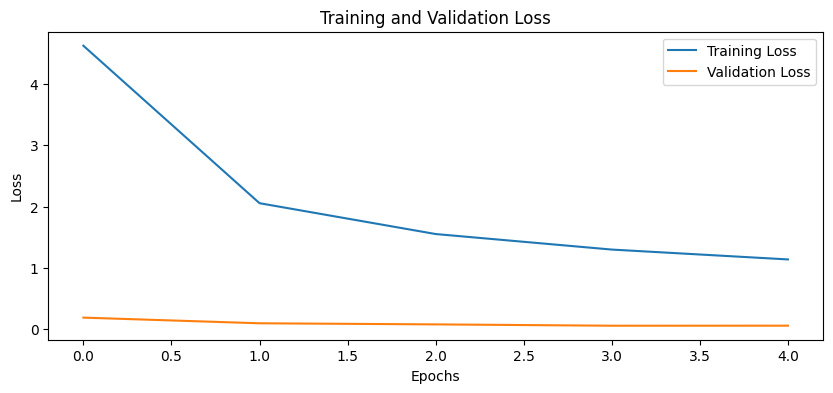

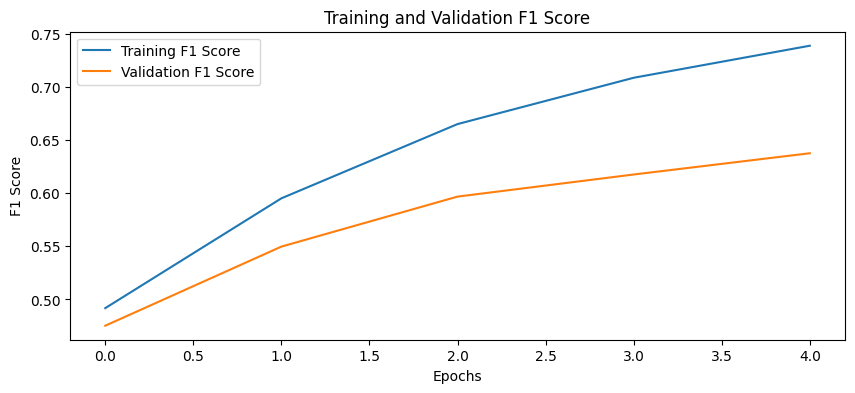

In [18]:
import matplotlib.pyplot as plt

# Loss Plot
plt.figure(figsize=(10, 4))
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

# F1 Score Plot
plt.figure(figsize=(10, 4))
plt.plot(train_f1_scores, label='Training F1 Score')
plt.plot(val_f1_scores, label='Validation F1 Score')
plt.xlabel('Epochs')
plt.ylabel('F1 Score')
plt.title('Training and Validation F1 Score')
plt.legend()
plt.show()

In [19]:
torch.save(model.state_dict(), './ner_bilstm_crf_fasttext.pth')

In [20]:
modelx = BiLSTM_CRF(len(word_to_ix), EMBEDDING_DIM, HIDDEN_DIM, embedding_matrix)

modelx.load_state_dict(torch.load('./ner_bilstm_crf_fasttext.pth'))
with torch.no_grad():
    precheck_sent = prepare_sequence(train_sentences[0], word_to_ix)
    precheck_tags = prepare_tags(train_labels[0])
    print("PRECHECK")
    print(model(precheck_sent))
    print(precheck_tags)


with torch.no_grad():
    predictions = []
    true_labels = []
    for sentence, tags in zip(test_sentences, test_labels):
        sentence_in = prepare_sequence(sentence, word_to_ix)
        _, output_tags = model(sentence_in)

        predictions.extend(output_tags)
        true_labels.extend(tags)

    f1 = f1_score(true_labels, predictions, average='macro')
    accuracy = accuracy_score(true_labels, predictions)
    
print("f1_score: ",f1)
print("accuracy: ",accuracy)

PRECHECK
(tensor(298.5826), [4, 15, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 8, 19, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22])
tensor([ 4, 15, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22,  8, 19, 22, 22, 22,
        22, 22, 22, 22, 22, 22, 22, 22])
f1_score:  0.630518069615622
accuracy:  0.9579776756401839


In [40]:
import nltk
from nltk.tokenize import word_tokenize

nltk.download('punkt')

sentence = "मानसून सीजन में हुई भारी बारिश ने कई राज्यों में भारी तबाही मचाई है"
tokens = word_tokenize(sentence)
print(tokens)

['मानसून', 'सीजन', 'में', 'हुई', 'भारी', 'बारिश', 'ने', 'कई', 'राज्यों', 'में', 'भारी', 'तबाही', 'मचाई', 'है']


[nltk_data] Downloading package punkt to /Users/shrutijha/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [39]:
sentence = "मानसून सीजन में हुई भारी बारिश ने कई राज्यों में भारी तबाही मचाई है"
new_sen =[]
for word in tokens:
    if word in word_to_ix:
        new_sen.append(word)

sentence_in = prepare_sequence(new_sen, word_to_ix)
_, output_tags = modelx(sentence_in)

predictions.extend(output_tags)

tags =[]
for i in output_tags:
    tags.append(ix_to_tag[i])
print(tags)

['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O']


In [41]:
import json

file_path = 'word_to_ix.json'

with open(file_path, 'w', encoding='utf-8') as json_file:
    json.dump(word_to_ix, json_file, ensure_ascii=False, indent=4)

print(f'Dictionary stored successfully in {file_path}')


Dictionary stored successfully in word_to_ix.json


In [43]:
import json

file_path = 'word_to_ix.json'

with open(file_path, 'r', encoding='utf-8') as json_file:
    word_to_ix = json.load(json_file)

print("Dictionary loaded successfully:")


Dictionary loaded successfully:
